****
# Import modules
****

In [1]:
import os
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

****
# Load Data
****

In [2]:
file_path = "C:\\Users\\kruu\\store\\data_LIRF\\"

data_LIRF = pd.read_parquet(os.path.join(file_path + "landing_df_LIRF_with_meteo_0_of_22.parquet"))

for i in range(1, 22):
    temp = pd.read_parquet(os.path.join(file_path + f"landing_df_LIRF_with_meteo_{i}_of_22.parquet"))
    data_LIRF = pd.concat((data_LIRF, temp))

In [3]:
data_LIRF[["avg_wind_dir", "avg_wind_speed", "avg_vis", "avg_temp", "avg_press"]].isna().any()

avg_wind_dir      True
avg_wind_speed    True
avg_vis           True
avg_temp          True
avg_press         True
dtype: bool

In [3]:
data_LIRF = data_LIRF.dropna()

In [4]:
data_LIRF["nominal_distance_prop"] = data_LIRF["distance"] / data_LIRF["nominal_distance"] 

****
# LR Model
****

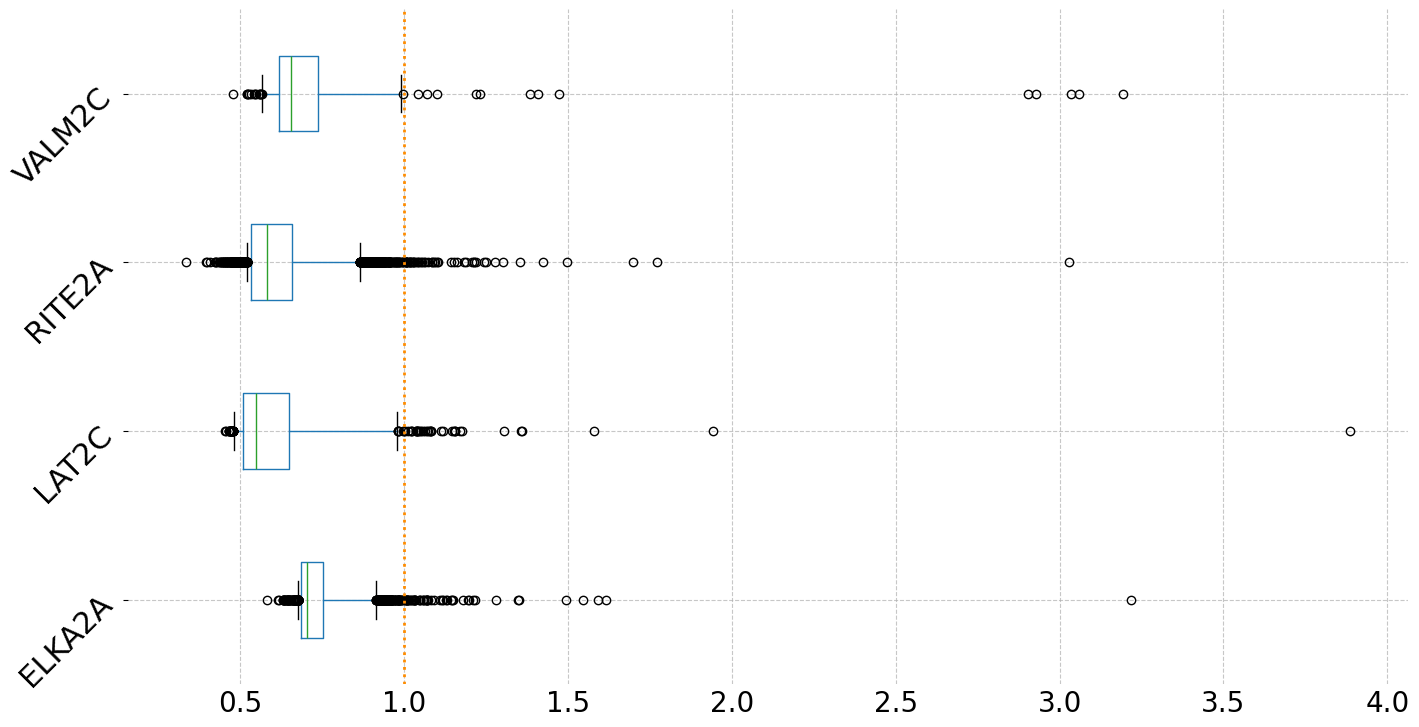

In [12]:
boxplot = data_LIRF.boxplot(["nominal_distance_prop"], by = ["star"],
                     figsize = (16, 9),
                     vert = False,
                     showmeans = False,
                     notch = False,
                     whis = (2.5,97.5))

boxplot.axvline(x=1, color='darkorange', linestyle=':', linewidth=2)

custom_labels = ['ELKA2A', 'LAT2C', 'RITE2A', 'VALM2C']
boxplot.set_yticklabels(custom_labels, fontsize=22, rotation=45)

boxplot.get_figure().suptitle('')
boxplot.set_ylabel("")
boxplot.set_title('')

boxplot.set_axisbelow(True)
boxplot.grid(True, linestyle='--', alpha=0.7)
boxplot.spines['top'].set_visible(False)
boxplot.spines['right'].set_visible(False)
boxplot.spines['left'].set_visible(False)
boxplot.spines['bottom'].set_visible(False)
boxplot.tick_params(axis='x', which='both', length=0, labelsize=20)

In [5]:
model_lm = smf.ols(
    "nominal_distance_prop ~ C(star) + C(weekday) + avg_vis + avg_wind_speed + C(season) + avg_vis + avg_press + C(body_type, Treatment(reference='Narrowbody')) + C(rush_hour) + avg_temp", 
    data_LIRF, 
)

res_lm = model_lm.fit()
res_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     nominal_distance_prop   R-squared:                       0.261
Model:                               OLS   Adj. R-squared:                  0.261
Method:                    Least Squares   F-statistic:                     399.2
Date:                   Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                           14:17:19   Log-Likelihood:                 17147.
No. Observations:                  20337   AIC:                        -3.426e+04
Df Residuals:                      20318   BIC:                        -3.411e+04
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       0.7368      0.012     59.850      0.000       0.713       0.761
C(star)[T.LAT2C]                                               -0.1186      0.003    -39.883      0.000      -0.124      -0.113
C(star)[T.RITE2A]                                              -0.1164      0.002    -71.756      0.000      -0.120      -0.113
C(star)[T.VALM2C]                                              -0.0133      0.005     -2.773      0.006      -0.023      -0.004
C(weekday)[T.1]                                                -0.0182      0.003     -6.467      0.000      -0.024      -0.013
C(weekday)[T.2]                                                -0.0152      0.003     -5.569      0.000      -0.021      -0.010
C(weekday)[T.3]                                                -0.0105      0.003     -3.961      0.000      -0.016      -0.005
C(weekday)[T.4]                                                -0.0006      0.003     -0.230      0.818      -0.006       0.005
C(weekday)[T.5]                                                -0.0193      0.003     -6.846      0.000      -0.025      -0.014
C(weekday)[T.6]                                                -0.0061      0.003     -2.261      0.024      -0.011      -0.001
C(season)[T.Spring]                                            -0.0064      0.002     -3.137      0.002      -0.010      -0.002
C(season)[T.Summer]                                            -0.0184      0.003     -6.789      0.000      -0.024      -0.013
C(season)[T.Winter]                                            -0.0164      0.003     -6.378      0.000      -0.021      -0.011
C(body_type, Treatment(reference='Narrowbody'))[T.Widebody]     0.0151      0.003      4.510      0.000       0.009       0.022
C(rush_hour)[T.True]                                            0.0369      0.002     24.582      0.000       0.034       0.040
avg_vis                                                        -0.0047      0.001     -3.881      0.000      -0.007      -0.002
avg_wind_speed                                                  0.0003      0.000      1.258      0.208      -0.000       0.001
avg_press                                                    6.166e-05   9.87e-05      0.625      0.532      -0.000       0.000
avg_temp                                                        0.0017      0.000      8.534      0.000       0.001       0.002
==============================================================================
Omnibus:                    26792.249   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17530390.8

In [15]:
res_lm.save("res_lr_lirf.pkl")

C:\Users\kruu\AppData\Local\Temp\ipykernel_10908\2246062915.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = significance_stars(p_values[indices][i])
C:\Users\kruu\AppData\Local\Temp\ipykernel_10908\2246062915.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if p_values[indices][i] < 0.05:
C:\Users\kruu\AppData\Local\Temp\ipykernel_10908\2246062915.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if p_values[ind

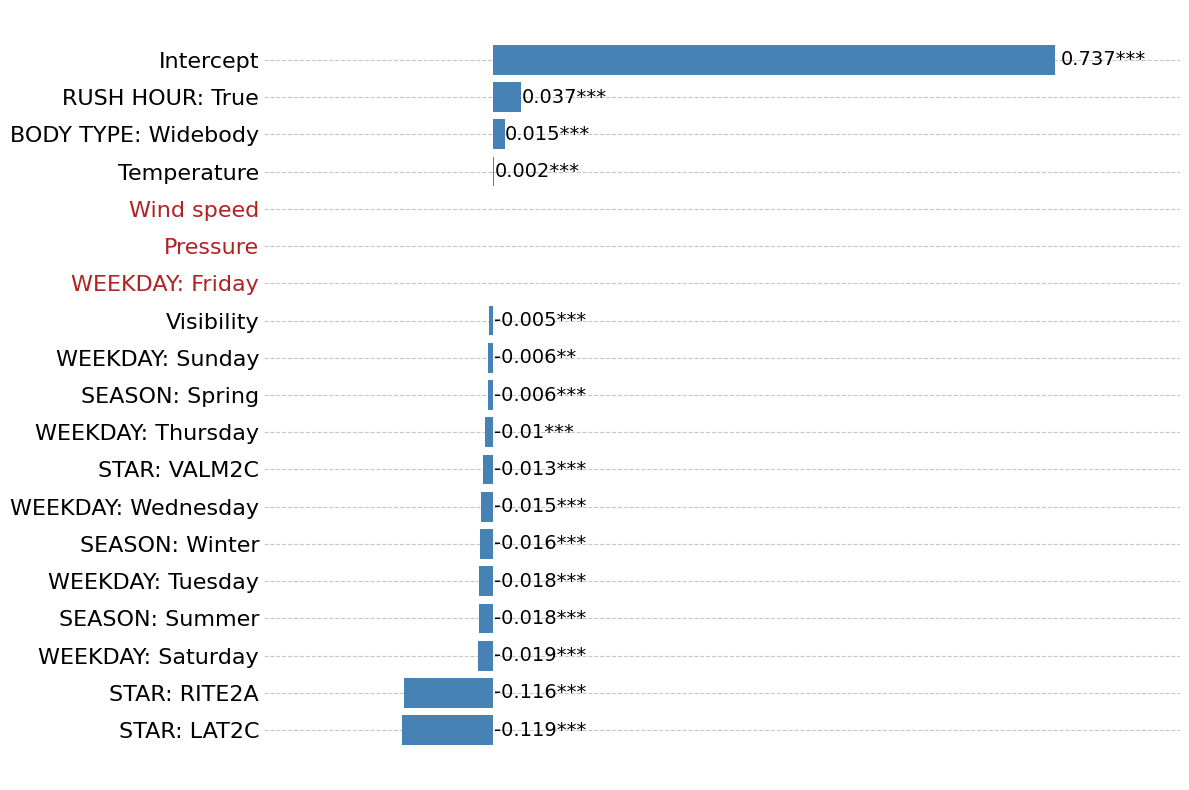

In [6]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = res_lm.params
p_values = res_lm.pvalues

# features = coefficients.index  # Feature names
features = np.array([ #Same order as coefficients.index 
    "Intercept", 
    "STAR: LAT2C",
    "STAR: RITE2A",
    "STAR: VALM2C",
    "WEEKDAY: Tuesday",
    "WEEKDAY: Wednesday",
    "WEEKDAY: Thursday",
    "WEEKDAY: Friday",
    "WEEKDAY: Saturday",
    "WEEKDAY: Sunday",
    "SEASON: Spring",
    "SEASON: Summer",
    "SEASON: Winter",
    "BODY TYPE: Widebody",
    "RUSH HOUR: True",
    "Visibility",
    "Wind speed",
    "Pressure",
    "Temperature",
])
importance = coefficients.values  # Absolute coefficients to represent feature importance

indices = np.argsort(importance)

bar_color = 'steelblue'

def significance_stars(p_value):
    if p_value <= 0.01:
        return '***'
    elif p_value <= 0.05:
        return '**'
    elif p_value <= 0.10:
        return '*'
    else:
        return ''

plt.figure(figsize=(12, 8))
plt.barh(range(len(importance)), importance[indices], align='center', color=bar_color)

for i in range(len(importance)):
    pvalue = significance_stars(p_values[indices][i])
    if p_values[indices][i] < 0.05: 
        if importance[indices][i] > 0:
            plt.text(importance[indices][i] * 1.01, i, f'{np.round(importance[indices][i],3)}{pvalue}', va='center', fontsize=14)
        else:
            plt.text(0.001, i, f'{np.round(importance[indices][i],3)}{pvalue}', va='center', fontsize=14)
        

y_labels = plt.yticks(range(len(importance)), features[indices], fontsize=16)
for i in range(len(importance)):
    if p_values[indices][i] > 0.05:
        y_labels[1][i].set_color('firebrick')

ax = plt.gca()
ax.set_xlim(-0.3, 0.9)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.title("")
plt.tight_layout()
plt.show()